In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from tools.preprocess import preprocess
import fasttext

In [8]:
lang = 'ru'
model_name = 'v2-128.ftz'

categories = ['society', 'sports', 'science', 'technology', 'entertainment', 'economy', 'other', 'not_news']

test_data = pd.read_csv(f"datasets/test_{lang}.tsv", sep="\t").values
test_x = test_data[:,0]
test_y = test_data[:,1]

idx = np.random.choice(np.arange(len(test_x)), 10000, replace=False)
test_x = test_x[idx]
test_y = test_y[idx]

for i in range(len(test_x)):
	test_x[i] = preprocess(test_x[i])

In [9]:
model = fasttext.load_model(f'models/cat_{lang}_{model_name}')
pred_y = [categories.index(model.predict(text)[0][0][9:]) for text in test_x]
vectors = [np.array(model.get_sentence_vector(text)) for text in test_x]

In [10]:
coords = TSNE(n_components=2).fit_transform(vectors)

### Predictions:

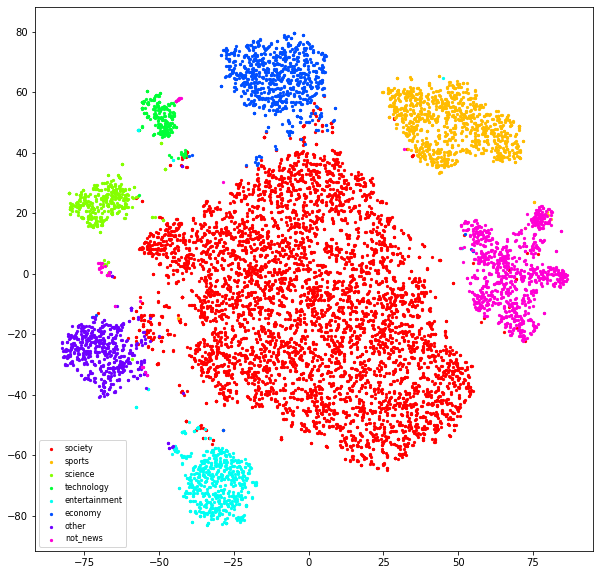

In [13]:
xs = [[] for i in range(8)]
ys = [[] for i in range(8)]

# colors = cm.rainbow(np.linspace(0, 1, 8))
# colors = cm.hsv(np.linspace(0, 1, 8))
colors = cm.get_cmap('hsv', 9)

# def one_hot_to_number(x):
# 	x = list(x)
# 	return x.index(max(x))


for i in range(len(test_y)):
	# label = one_hot_to_number(test_y[i])
	label = pred_y[i]
	xs[label].append(coords[i][0])
	ys[label].append(coords[i][1])

plt.figure(figsize=(10, 10))
scatters = [plt.scatter(xs[i], ys[i], color=colors(i), s=5) for i in range(8)]
plt.legend(scatters, categories, scatterpoints=1, loc='lower left', fontsize=8)

### True labels:

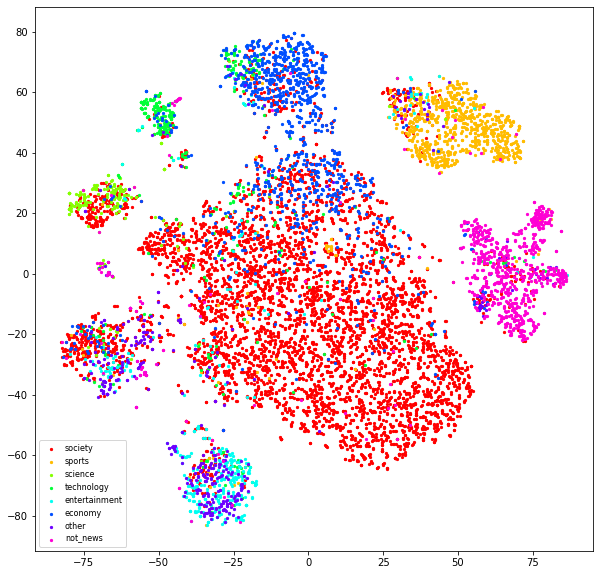

In [14]:
xs = [[] for i in range(8)]
ys = [[] for i in range(8)]

for i in range(len(test_y)):
	label = test_y[i]
	xs[label].append(coords[i][0])
	ys[label].append(coords[i][1])

plt.figure(figsize=(10, 10))
scatters = [plt.scatter(xs[i], ys[i], color=colors(i), s=5) for i in range(8)]
plt.legend(scatters, categories, scatterpoints=1, loc='lower left', fontsize=8)